<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([5.59586611, 6.32965623, 4.55069937, 1.74292071, 4.56640493,
       3.5487445 , 4.85416643, 5.43672073, 5.14629341, 5.54363387])

### 1.2 Visualising the random numbers

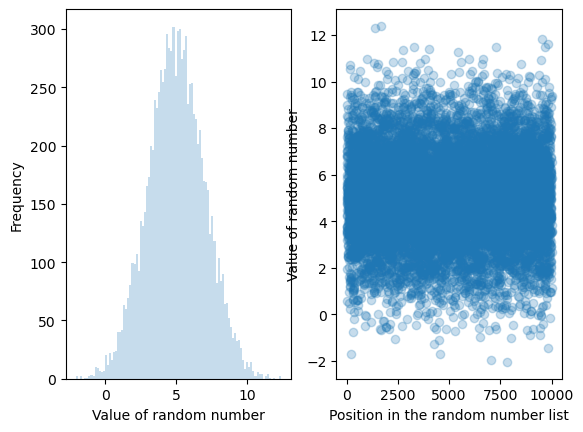

In [5]:
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.show()

### 1.3 68%?

In [21]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.00%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [2]:
import numpy.random as rnd
def brown_1d(prob_right=.5, no_of_steps=10000):
    step = 1
    x = 0
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:
            x += step
        else:
            x -= step
    return x
brown_1d()

-134

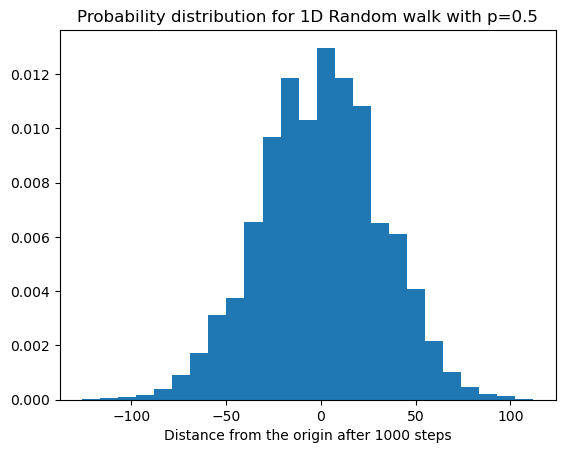

In [57]:
from matplotlib import pyplot as plt
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]
plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.show()

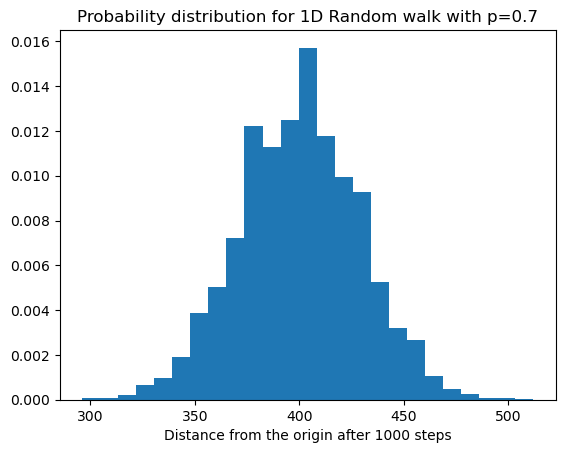

In [3]:
from matplotlib import pyplot as plt
no_of_steps, p = 1_000, .7
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.show()
#Expected is 400 cause its np - nq = 700 - 300 = 400

### 1.3 What does theory say?

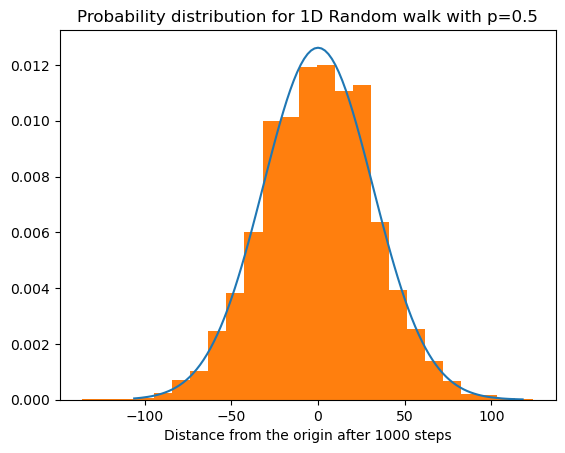

In [8]:
def normal(x, m=0, s=1):
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output
prob_right = .5
prob_left = 1 - 0.5                      # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4* no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
#why is sd not np(1-p)=npq                       # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
from matplotlib import pyplot as plt

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

pi is approximately equal to 4*( area of green cicle/area of square)

### 2.2 A poor but intuitive solution

In [62]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13916

### 2.3 A better solution

In [83]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!
4 * (N_green / N_total)

3.143184

### 2.4 A smarter solution

In [84]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.143936

## Exercise 1 :  Vital Stats of Random π

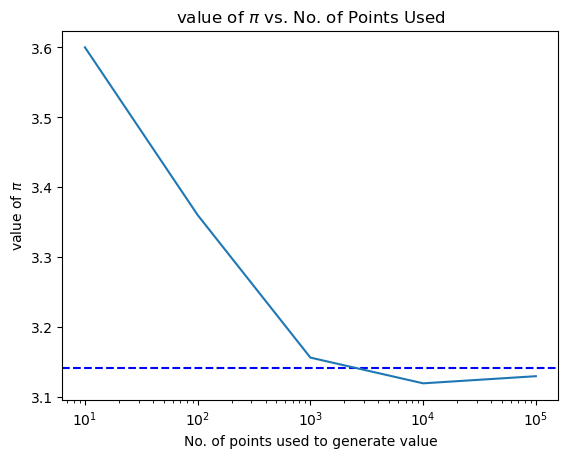

In [116]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / n)

x = np.array([10, 100, 1000, 10_000, 100_000])
y = np.array([estimate_pi(i) for i in x])
''''
fig, ax = plt.subplots(ncols = 1, nrows = 1)
ax.set.axhline(np.pi, ls = '--', c = 'blue')
ax[0].set.xscale('log')
'''''

plt.axhline(np.pi, ls = '--', c = 'blue')
plt.plot(x,y, label = 'Value of $pi$ vs. No. of Points Used')
plt.xlabel('No. of points used to generate value')
plt.ylabel('value of ' + r'$\pi$') # another way?
plt.xscale('log')
plt.title('value of ' + r'$\pi$' + ' vs. No. of Points Used')
plt.show()


